In [37]:
import pandas as pd
#import numpy as np
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.preprocessing import LabelEncoder
#from feature_selector import FeatureSelector
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [2]:
PRG=pd.read_table('PRG_STUDENT_SITE_2017_2018_DATA_TABLE.txt',encoding='cp1252')
df=PRG

In [3]:
df.count()

ID_ANO            13262
PRG               13262
ANNEE_SCOLAIRE    13262
SITE              13262
dtype: int64

In [4]:
df.head()

,ID_ANO,PRG,ANNEE_SCOLAIRE,SITE
0,70031777,ING3,2015/2016,Cergy
1,70031777,BI,2015/2016,Cergy
2,70031777,SIE,2014/2015,Cergy
3,70031777,ING2,2014/2015,Cergy
4,70031777,GI,2014/2015,Cergy


In [5]:
df['ANNEE_SCOLAIRE'].unique()

array(['2015/2016', '2014/2015', '2012/2013', '2013/2014', '2016/2017',
       '2011/2012', '2008/2009', '2009/2010', '2009/2009', '2010/2011',
       '2017/2018'], dtype=object)

In [15]:
df['PRG1']=df['PRG'].str[:3]
df['ANNE']=df['ANNEE_SCOLAIRE'].str[:4]
df.head()

,ID_ANO,PRG,ANNEE_SCOLAIRE,SITE,PRG1,ANNE
0,70031777,ING3,2015/2016,Cergy,ING,2015
1,70031777,BI,2015/2016,Cergy,BI,2015
2,70031777,SIE,2014/2015,Cergy,SIE,2014
3,70031777,ING2,2014/2015,Cergy,ING,2014
4,70031777,GI,2014/2015,Cergy,GI,2014


In [19]:
df.isnull().sum()

ID_ANO            0
PRG               0
ANNEE_SCOLAIRE    0
SITE              0
PRG1              0
ANNE              0
dtype: int64

In [53]:
big5=df.groupby(['PRG1']).size().nlargest(5)

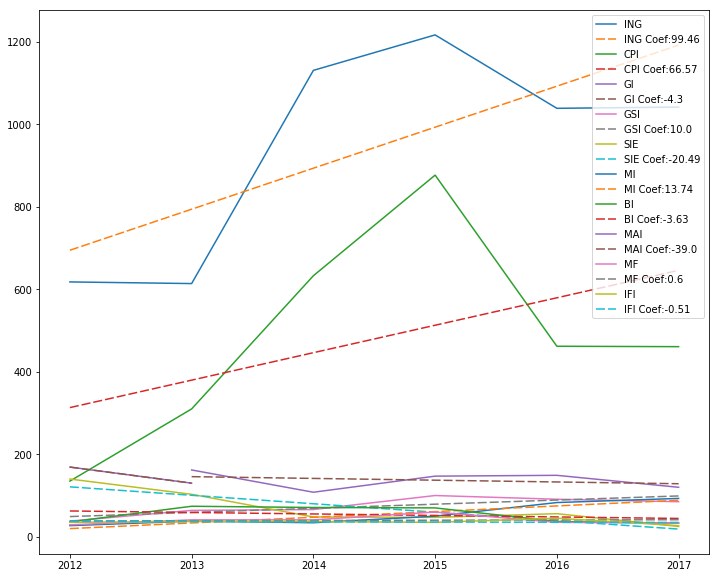

In [181]:
#df=df.set_index('ANNE')
df.index

# programs=df['PRG1'].unique()
bigs=df.groupby(['PRG1']).size().nlargest(10)
# Years 2008 and 2009 has just 4 rows
dfY=df[ ~df.index.isin(['2008','2008','2010','2011']) ]
programs=bigs.index.values
plt.subplots(figsize=(12, 10))
i=0
for p in programs:
    z=dfY[ (dfY['PRG1']==p) ].groupby('ANNE').size()
    X=pd.DataFrame(z.index)
    y=pd.DataFrame(z[:].values)
    model.fit(X, y)
    yLinear=model.predict(X)
    plt.plot( z,   label=p )
    plt.plot( z.index, yLinear,  label=p+' Coef:'+ str( round( model.coef_[0][0], 2)), dashes=[6,2] )
#     i=i+2
#     color=plt.cm.flag(i),
    
plt.legend( loc='upper right')
plt.show()

# Analysis:
# Coef Beta1 > 0, program is growing;
# If last years going down, maybe the PRG is satured (like ING e CPI)

In [133]:
z=dfY[ (dfY['PRG1']=='ING')].groupby('ANNE').size()
X=pd.DataFrame(z.index)
y=pd.DataFrame(z[:].values)

scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:]) 
 scores.append(model.score(X.iloc[test,:], y.iloc[test,:]))
print(scores)
print(model.coef_)

[-97679.65625, -33.46869082186593, -3.761958169835866]
[[91.14285714]]


array([35, 37, 37, 35, 45, 27], dtype=int64)